### Question 1

#### Solution

   - The expectation $(\mu)$ of $X_i$ is 0.5.
   - The variance $(\sigma^2)$ of $X_i$ is $\frac{1}{12}$.
   - By the Central Limit Theorem (CLT), for large $n$, $\bar{X}$ approximately follows a normal distribution:
     $
     \bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)
     $
   - Here, $\mu = 0.5$ và $\sigma^2 = \frac{1}{12}$, $n = 30$.
   - The expectation of $\bar{X}$: $\mu_{\bar{X}} = \mu = 0.5$.
   - The variance of $\bar{X}: \sigma^2_{\bar{X}} = \frac{\sigma^2}{n} = \frac{1/12}{30} = \frac{1}{360}$.
   - The standard deviation of $\bar{X}: \sigma_{\bar{X}} = \sqrt{\frac{1}{360}} = \frac{1}{\sqrt{360}}$.
   - We need to find:
     $
     P\left(0.5 \leq \bar{X} \leq 0.6\right) \approx
     P\left(\frac{0.5 - 0.5}{\sigma_{\bar{X}}} \leq Z \leq \frac{0.6 - 0.5}{\sigma_{\bar{X}}}\right) = P\left(0 \leq Z \leq \frac{0.1}{\sigma_{\bar{X}}}\right)
     $

   - $Z = \frac{0.1}{\sigma_{\bar{X}}} = 0.1 \times \sqrt{360} \approx 1.897$.

   - From the standard normal distribution table $P(Z \leq 1.897) \approx 0.971$. Therefore, the probability $P(0 \leq Z \leq 1.897) \approx 0.971 - 0.5 = 0.471$.

   The probability that the average of 30 numbers randomly selected from the interval $[0, 1]$  lies between 0.5 and 0.6 is approximately 47.1%.


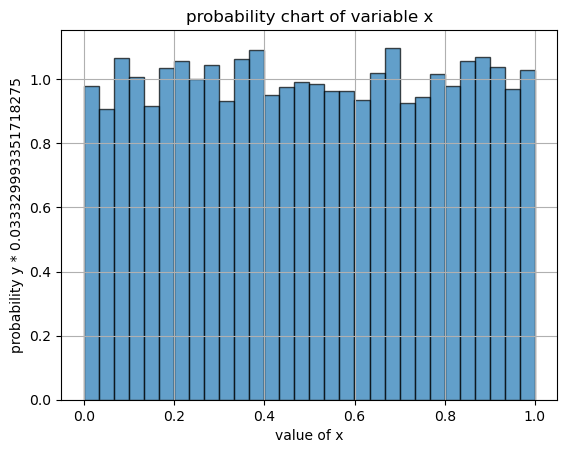

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creates a sample of 10000 random values between 0 and 1
sample_size = 10000
samples = np.random.uniform(0, 1, sample_size)

# Plots the histogram with 30 bins, black edges, and an alpha level of 0.7 
# The alpha level controls the opacity of the bars
plt.hist(samples, bins=30, edgecolor='k', alpha=0.7, density=True)  # Sets the y-axis to show probability

# Adds a title, labels for the axis, and a grid
plt.title('probability chart of variable x')
plt.xlabel('value of x')
s = 'probability y * ' + str((max(samples) - min(samples)) / 30)
plt.ylabel(s)
plt.grid(True)

# Displays the plot
plt.show()


probability of sample is 0.4828
The probability of the theoretical sample space is 0.47111021443820106


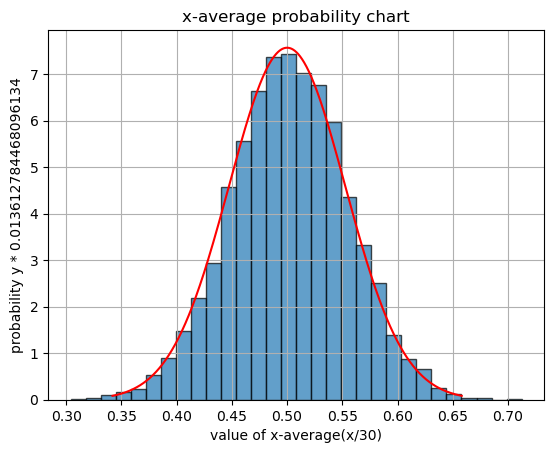

In [2]:
from scipy.integrate import quad
from scipy.stats import norm
o = []
for i in range(10000):
    t = 0
    for j in range(30):
        t += np.random.choice(samples)
    o.append(t / 30)
plt.hist(o, bins=30, edgecolor='k', alpha=0.7, density=True)
x = np.linspace(0.5 - 3 * np.sqrt(1 / 360), 0.5 + 3 * np.sqrt(1 / 360), 1200)
pdf = norm.pdf(x, 0.5, np.sqrt(1 / 360))
plt.plot(x, pdf, label='ppx', color='r', linestyle='-', marker='')
plt.title('x-average probability chart')
plt.xlabel('value of x-average(x/30)')
s = 'probability y * ' + str((max(o) - min(o)) / 30)
plt.ylabel(s)
# plt.ylim(0, 0.5)
plt.grid(True)
cout = 0
for i in o:
    if i >= 0.5 and i <= 0.6:
        cout += 1
print("probability of sample is", cout / len(o))
print('The probability of the theoretical sample space is',
      quad(lambda x: (1 / (np.sqrt(1 / 360) * np.sqrt(2 * np.pi))) * np.exp(-(x - 0.5) * (x - 0.5) / (2 * 1 / 360)),
           0.5, 0.6)[0])


### Question 2

#### Solution
   - Population mean $(\mu)$: 12 cm
   - Population standard deviation $(\sigma)$: 0.2 cm
   - Sample size \(n\): 100
   \
 $\text{SEM}$ = $\frac{\sigma}{\sqrt{n}}$ = $\frac{0.2}{\sqrt{100}}$ = $\frac{0.2}{10}$ = 0.02
  
  
   $P(11.97 \leq \bar{X} \leq 12.04) 
                                     =P(\frac{11.97 - 12}{0.02} \leq Z \leq \frac{12.04 - 12}{0.02})
                                     =P(-1.5 \leq Z \leq 2 )
                                     =P(Z \leq 2) - (1 - P(Z \leq 1.5))
                                     = 0.9772 - (1 - 0.9332)
                                     = 0.9104$
      
   $P(11.97 \leq \bar{X} \leq 12.04) \approx 0.91$
   

The probability that the lot is NOT defective is approximately *0.91* (or 91%).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 12
variance = 0.2 ** 2
sample_size = 10000
samples = np.random.normal(loc=mean, scale=np.sqrt(variance), size=sample_size)
plt.hist(samples, bins=30, edgecolor='k', alpha=0.7, density=True)
x = np.linspace(mean - 3 * np.sqrt(variance), mean + 3 * np.sqrt(variance), 1000)
pdf = norm.pdf(x, mean, np.sqrt(variance))
plt.plot(x, pdf, label='ppx', color='b', linestyle='-', marker='')
plt.title('Biểu đồ tần suất của không gian mẫu')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

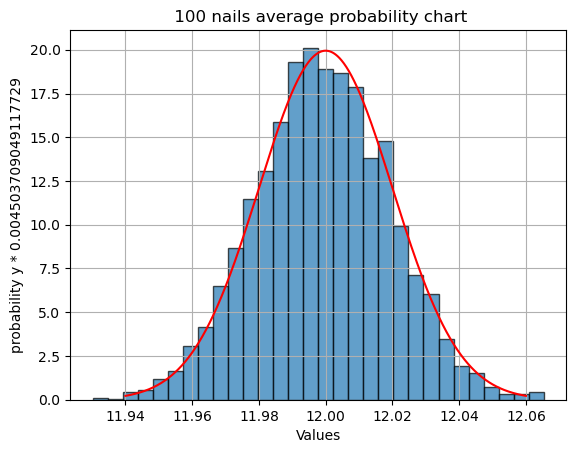

probability of sample is  0.904
The probability of the theoretical sample space is: 0.910442666782959


In [4]:
import random
from scipy.integrate import quad
def dpf(x):
    return norm.pdf(x, loc=mean, scale=np.sqrt(variance)/10)
weight = [1]*sample_size
o = []
for i in range(5000):
    t = 0
    for i in range(100):
        mau = random.choice(samples)
        t = t+mau
    o.append(t/100)
x = np.linspace(mean - 3*np.sqrt(variance)/10, mean + 3*np.sqrt(variance)/10, 1200)
pdf = norm.pdf(x, mean, np.sqrt(variance)/10)
plt.hist(o, bins=30, edgecolor='k', alpha=0.7,density=True)
plt.plot(x, pdf, label='ppx', color='r', linestyle='-', marker='')
plt.title(' 100 nails average probability chart')
plt.xlabel('Values')
s = 'probability y * ' + str((max(o)-min(o))/30)
plt.ylabel(s)
plt.grid(True)
plt.show()   
t = 0
for i in o:
    if i>11.97 and i<12.04:
        t = t+1
print('probability of sample is ',t/5000)
print('The probability of the theoretical sample space is:',quad(dpf,-np.inf,12.04)[0]-quad(dpf,-np.inf,11.97)[0])


- $(TF \sim N(15, 10) )$ is the
time
to
catch
a
fish(minutes).
- $(TT \sim N(10, 8) )$ is the
time
waiting
for the fish to bite (minutes).
- $(TF)$ và $(TT)$   are
independent.

The
total
time $(T)$ is:
$T = TF_1 + TT_2 + TF_2 + TT_3 + TF_3 $

We
have:
- $(TF_1, TF_2, TF_3)$ is the
time
it
takes
to
catch
each
fish.
- $(TT_2, TT_3)$ is the
time
waiting
for the fish to bite after catching the first fish.

## Mean $ E[T]$
$ E[T] = E(TF_1) + E(TT_2) + E(TF_2) + E(TT_3) + E(TF_3) = 15 + 10 + 15 + 10 + 15 = 65 $

## Variance ${Var}[T] $
$ \text
{Var}[T] = {Var}(TF_1) + {Var}(TT_2) + {Var}(TF_2) + {Var}(TT_3) + {Var}(TF_3) = 10 + 8 + 10 + 8 + 10 = 46 $

## Results

- Mean $ E[T] = 65 $   minutes
- Variance $ {Var}[T] = 46 $   minutes

[16.1073634  14.87262549 15.90910479 ... 21.03026346 13.40336726
 16.34351549]


Text(0, 0.5, 'probability y * 0.8179183084443793')

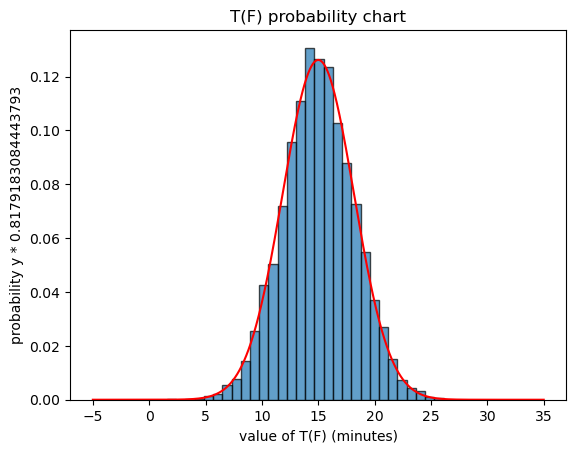

In [5]:
sample_size = 10000
variance = 10
kv = 15
samples = np.random.normal(loc=kv, scale=np.sqrt(variance), size=sample_size)
print(samples)
plt.hist(samples, bins=30, edgecolor='k', alpha=0.7, density=True)
x = np.linspace(kv - 2 * variance, kv + 2 * variance, 1200)
pdf = norm.pdf(x, kv, np.sqrt(variance))
plt.plot(x, pdf, label='ppx', color='r', linestyle='-', marker='')
plt.title('T(F) probability chart')
plt.xlabel('value of T(F) (minutes)')
s = 'probability y * ' + str((max(samples) - min(samples)) / 30)
plt.ylabel(s)

Text(0, 0.5, 'probability y * 0.6937337607323573')

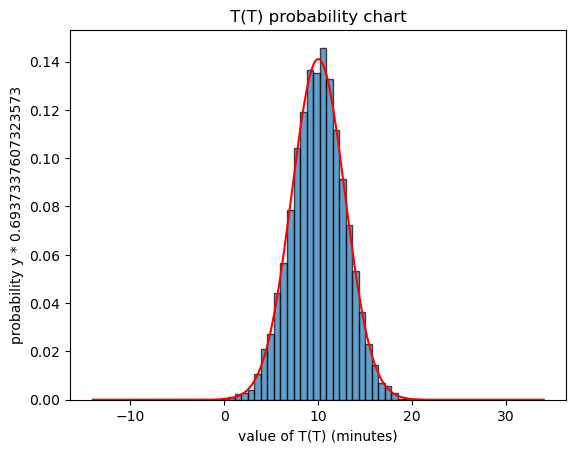

In [6]:
sample_size1 = 10000
variance1 = 8
kv1 = 10
samples1 = np.random.normal(loc=kv1, scale=np.sqrt(variance1), size=sample_size)
plt.hist(samples1, bins=30, edgecolor='k', alpha=0.7, density=True)
x1 = np.linspace(kv1 - 3 * variance1, kv1 + 3 * variance1, 1200)
pdf1 = norm.pdf(x1, kv1, np.sqrt(variance1))
plt.plot(x1, pdf1, label='ppx', color='r', linestyle='-', marker='')
plt.title('T(T) probability chart')
plt.xlabel('value of T(T) (minutes)')
s = 'probability y * ' + str((max(samples1) - min(samples1)) / 30)
plt.ylabel(s)

mean of sample:  65.10984175601982
variance:  45.637084783901585


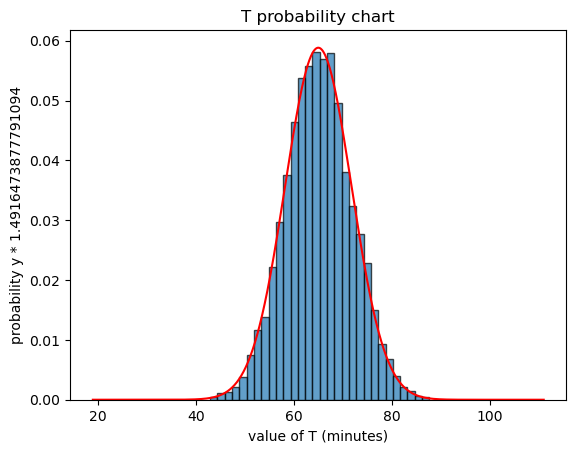

In [7]:
o = []
variance1 = 46
kv1 = 65

for i in range(10000):
    t = np.random.choice(samples) + np.random.choice(samples1) + np.random.choice(samples) + np.random.choice(
        samples1) + np.random.choice(samples)
    o.append(t)
plt.hist(o, bins=30, edgecolor='k', alpha=0.7, density=True)
x = np.linspace(kv1 - variance1, kv1 + variance1, 1200)
pdf1 = norm.pdf(x, kv1, np.sqrt(variance1))
plt.plot(x, pdf1, label='ppx', color='r', linestyle='-', marker='')
plt.title('T probability chart')
plt.xlabel('value of T (minutes)')
s = 'probability y * ' + str((max(o) - min(o)) / 30)
plt.ylabel(s)
t = 0
mean_of_samples = np.mean(o)
print("mean of sample: ", mean_of_samples)
for i in o:
    t = t + (i - mean_of_samples) ** 2
print("variance: ", t / len(o))